In [7]:
import matplotlib.image as mpimg
from matplotlib.image import imsave
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imsave
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from matplotlib.image import imsave
import os

In [5]:
bbox_file_path = f'/mnt/DATA/dronetracking/Anti-UAV-Tracking-V0GT/video09_gt.txt'

with open(bbox_file_path, 'r') as bbox_file:
    bboxes = bbox_file.readlines()

x, y, w, h = map(int, bboxes[0].strip().split())

print(x,y,w,h)

113 191 110 50


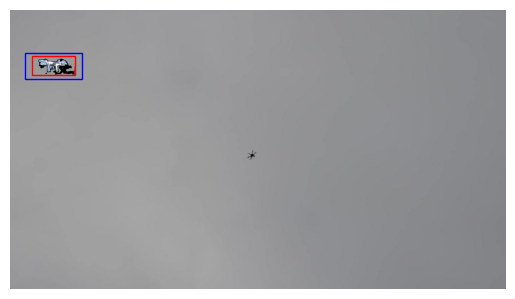

In [13]:
comp_img_path = f'/mnt/DATA/dronetracking/final_composition/compostion_result/foreground_video9_compo/comp9_04/combined_00001.png'
image = mpimg.imread(comp_img_path)
fig, ax = plt.subplots()
ax.imshow(image)

y_min = int(y - (h / 4))
y_max = int(y + h + (h / 4))
x_min = int(x - (w / 4))
x_max = int(x + w + (w / 4))

y_min_2 = int(y - (h / 2))
y_max_2 = int(y + h + (h / 2))
x_min_2 = int(x - (w / 2))
x_max_2 = int(x + w + (w / 2))


rect = Rectangle((x_min, y_min), (x_max - x_min), (y_max - y_min), edgecolor='red', facecolor='none', linewidth=1)
ax.add_patch(rect)

rect_2 = Rectangle((x_min_2, y_min_2), x_max_2 - x_min_2, y_max_2 - y_min_2, edgecolor='blue', facecolor='none', linewidth=1)
ax.add_patch(rect_2)


plt.axis('off')
plt.show()

In [17]:
between_boxes_region = image[y_min_2:y_max, x_min_2:x_max]

# Calculate the average pixel value for the region between the two boxes
average_between_boxes = np.mean(between_boxes_region)

# print(between_boxes_region)

print("Average pixel value between the two boxes:", average_between_boxes)

Average pixel value between the two boxes: 0.52193516


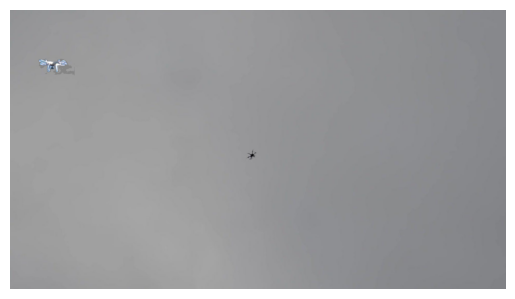

In [18]:
bbox_region = image[y_min:y_max, x_min:x_max]
bbox_region[bbox_region == 0] = average_between_boxes

# Display the image with filled pixels
plt.imshow(image)
plt.axis('off')
plt.show()